In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline

In [17]:
train = pd.read_csv('data/train.csv', chunksize = 500000) #generator
trained_dfs = []
for i in range(10):
    trained_dfs.append(next(train))

In [18]:
trained_dfs[0].head()

,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691


In [19]:
trained_dfs[0].shape

(500000, 2)

In [20]:
trained_dfs[1].head()

,acoustic_data,time_to_failure
500000,1,1.3393
500001,-2,1.3393
500002,0,1.3393
500003,1,1.3393
500004,2,1.3393


In [21]:
train_samp = pd.DataFrame(trained_dfs[0])
earthquake=[0]
train_samp.time_to_failure.isin(earthquake) #time_to_failure does not go to 0

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
499970    False
499971    False
499972    False
499973    False
499974    False
499975    False
499976    False
499977    False
499978    False
499979    False
499980    False
499981    False
499982    False
499983    False
499984    False
499985    False
499986    False
499987    False
499988    False
499989    False
499990    False
499991    False
499992    False
499993    False
499994    False
499995    False
499996    False
499997    False
499998    False
499999    False
Name: time_to_failure, L

In [22]:
min(trained_dfs[0].time_to_failure)

1.3392996675

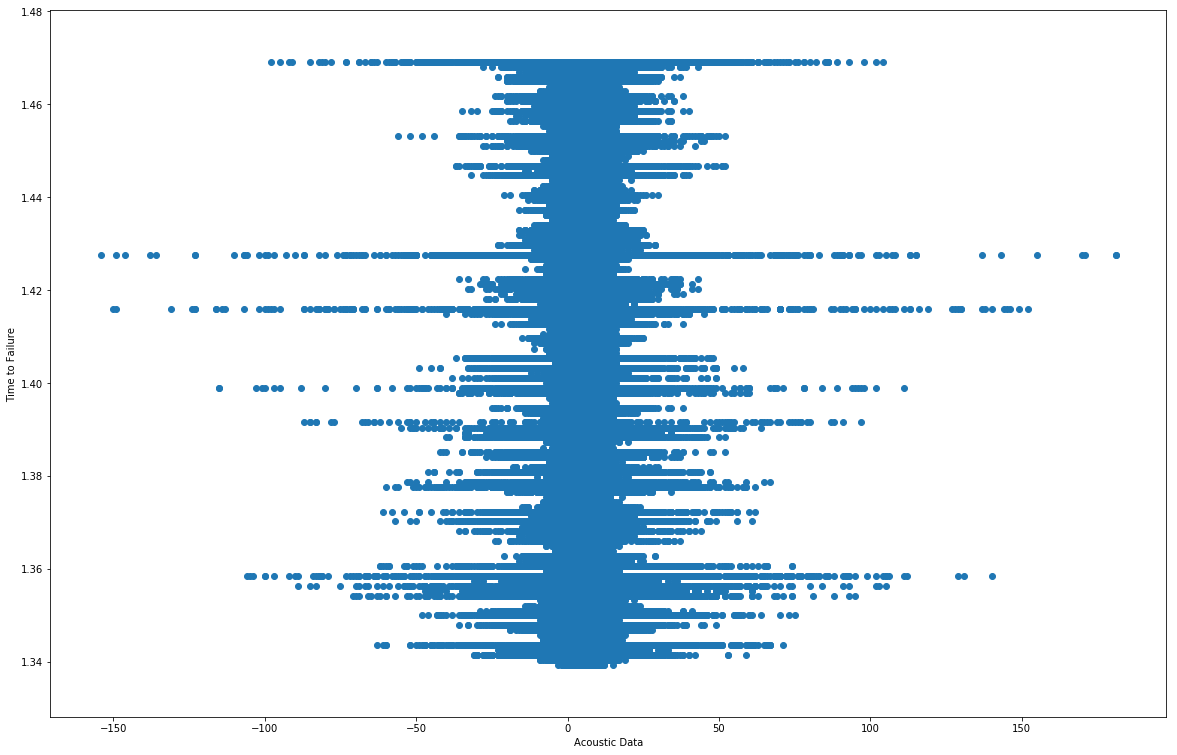

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 13)
plt.scatter(train_samp.acoustic_data,train_samp.time_to_failure,)
plt.xlabel('Acoustic Data')
plt.ylabel('Time to Failure')
plt.show()
# What patterns are observed with the data?
# Earthquake occurs when acoustic data =0
# What patterns exist with the time to failure data and acoustic data... use to predit
# Consider statistics like kurtosis, threshold, 

In [24]:
np.mean(trained_dfs[0].acoustic_data)

4.839246

In [25]:
min(trained_dfs[0].acoustic_data)

-154

In [26]:
def add_time_column(df,increment=0.000000250):
    times=[]
    set_value=0
    for i in range(0,len(df)):
        times.append(set_value)
        set_value+=increment
    return times

In [27]:
trained_dfs[0]['experimental_run_time']=add_time_column(trained_dfs[0])
trained_dfs[0].head()

,acoustic_data,time_to_failure,experimental_run_time
0,12,1.4691,0.000000e+00
1,6,1.4691,2.500000e-07
2,8,1.4691,5.000000e-07
3,5,1.4691,7.500000e-07
4,8,1.4691,1.000000e-06


In [28]:
for i in range(len(trained_dfs)):
    trained_dfs[i]['experimental_run_time']=add_time_column(trained_dfs[i])
    trained_dfs[i]['ID']=trained_dfs[i].index

trained_dfs[1].head()

,acoustic_data,time_to_failure,experimental_run_time,ID
500000,1,1.3393,0.000000e+00,500000
500001,-2,1.3393,2.500000e-07,500001
500002,0,1.3393,5.000000e-07,500002
500003,1,1.3393,7.500000e-07,500003
500004,2,1.3393,1.000000e-06,500004


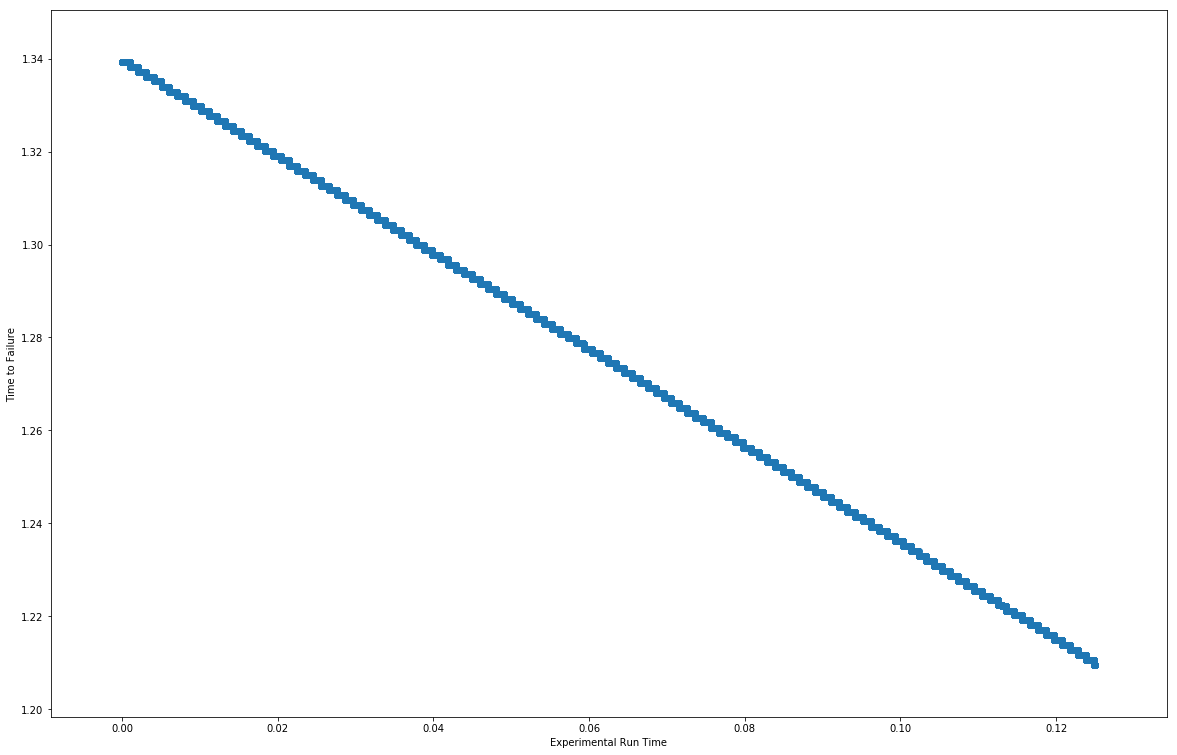

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 13)
plt.scatter(trained_dfs[1].experimental_run_time,trained_dfs[1].time_to_failure,)
plt.xlabel('Experimental Run Time')
plt.ylabel('Time to Failure')
plt.show()

In [130]:
rolling_tide=trained_dfs[1]
rolling_tide['Average']=rolling_tide.time_to_failure.rolling(150).std()
rolling_tide.tail()

,acoustic_data,time_to_failure,experimental_run_time,ID,Average
999995,6,1.209499,0.124999,999995,0.0
999996,5,1.209499,0.124999,999996,0.0
999997,7,1.209499,0.124999,999997,0.0
999998,6,1.209499,0.124999,999998,0.0
999999,4,1.209499,0.125000,999999,0.0


In [ ]:
#See website for more code and functions for visualizing decision trees...https://jakevdp.github.io/PythonDataScienceHandbook/06.00-figure-code.html#Helper-Code

In [131]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

In [155]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

X = np.array(rolling_tide.acoustic_data)
y = np.array(rolling_tide.time_to_failure)

X = X.reshape(-1,1)
y = y.reshape(-1,1)

bag.fit(X, y)
#visualize_classifier(bag, X, y)



C:\Users\unews\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unknown label type: 'continuous'

In [133]:
?BaggingClassifier()